# 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 3: 모델링

## [미션]

- 모델링을 수행합니다.
    - 전처리를 추가로 진행합니다.
    - 4개 이상의 알고리즘을 사용해 모델링을 수행합니다.
    - 각 모델에 대해 성능 튜닝을 수행합니다.
    - 성능을 비교해 최선의 모델을 선정합니다.
- 데이터 파이프라인 함수를 만듭니다.
- 새로운 데이터를 읽어와 예측을 수행합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [3]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [5]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [7]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 모델링용 라이브러리 불러오기



# 기타 라이브러리 불러기기
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 base_data2.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 data 데이터프레임으로 선언하고 기본 정보를 확인합니다.

In [9]:
# 파일 읽어오기
data = joblib.load(path+'base_data2.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     345 non-null    int64  
 1   준공연도     345 non-null    int64  
 2   건물형태     345 non-null    object 
 3   난방방식     345 non-null    object 
 4   승강기설치여부  345 non-null    object 
 5   실차량수     345 non-null    int64  
 6   총면적      345 non-null    float64
 7   10-30    345 non-null    int64  
 8   30-40    345 non-null    int64  
 9   40-50    345 non-null    int64  
 10  50-60    345 non-null    int64  
 11  60-70    345 non-null    int64  
 12  70-80    345 non-null    int64  
 13  80-200   345 non-null    int64  
 14  임대보증금    345 non-null    float64
 15  임대료      345 non-null    float64
dtypes: float64(3), int64(10), object(3)
memory usage: 43.3+ KB


In [11]:
data.describe()

,총세대수,준공연도,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [12]:
data.isna().sum()

총세대수       0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
10-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70-80      0
80-200     0
임대보증금      0
임대료        0
dtype: int64

In [13]:
data.dtypes

총세대수         int64
준공연도         int64
건물형태        object
난방방식        object
승강기설치여부     object
실차량수         int64
총면적        float64
10-30        int64
30-40        int64
40-50        int64
50-60        int64
60-70        int64
70-80        int64
80-200       int64
임대보증금      float64
임대료        float64
dtype: object

### (6) 함수 생성

- 실젯값과 모델이 예측한 값을 시각화해 비교할 함수를 만듭니다.

In [15]:
# 실젯값, 예측값 비교 함수 만들기
def model_plot(y_test, y_pred):
    plt.figure(figsize=(10, 3))
    plt.plot(y_test.values, label='Actual', linewidth=0.7, marker='o', markersize=2)
    plt.plot(y_pred, label='Predicted', linewidth=0.7, marker='o', markersize=2)
    plt.legend()
    plt.show()

## 2. 모델링

- 모델링을 위한 결측치 처리, 데이터 분할, 스케일링, 가변수화 등을 수행합니다.
- 4개 이상의 알고리즘을 사용하여 모델을 만듭니다.
- 모델 이름은 서로 다르게 합니다. (예: model1, model2...)
- Linear Regression 이외의 알고리즘을 사용한 모델은 GridSearchCV() 함수로 성능 최적화를 수행합니다.
- 적절한 평가지표로 모델의 성능을 평가합니다.
- 실젯값과 예측값을 시각화해 비교합니다.
- 성능 비교를 통해 최선의 모델을 선정합니다.

### (1) 데이터 전처리

- 필요한 전처리를 수행합니다.

In [18]:
data

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


#### 1) 가변수화

- '건물형태', '난방방식' 변수에 대해 가변수화를 수행합니다.

In [20]:
#타입인 obj 피처 찾기
categorical_columns = data.select_dtypes(include=['object']).columns

print(categorical_columns)
#unique값 확인
for col in categorical_columns[:]:
    print(data[col].unique())
#가변수화
data_dummies=pd.get_dummies(data,columns=['건물형태','난방방식'],drop_first=True, dtype=int)
data_dummies['승강기설치여부']=data_dummies['승강기설치여부'].astype('int32')
data_dummies

Index(['건물형태', '난방방식', '승강기설치여부'], dtype='object')
['계단식' '복도식' '혼합식']
['개별' '지역' '중앙']
['1' '0']


,총세대수,준공연도,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,78,2013,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000,0,0,0,0
1,35,2013,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000,1,0,0,0
2,88,2013,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000,0,0,0,0
3,477,2014,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000,1,0,0,1
4,15,2013,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286,1,0,1,0
341,1386,1993,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000,1,0,1,0
342,956,1994,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000,1,0,0,1
343,120,2020,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000,1,0,0,0


#### 2) x, y 분리

- Target를 지정하고, x와 y로 분리합니다.

In [23]:
y=data_dummies['실차량수']
x=data_dummies.drop('실차량수',axis=1)

0      109
1       35
2       88
3      943
4       21
      ... 
340    298
341    258
342    243
343     47
344     78
Name: 실차량수, Length: 345, dtype: int64


,총세대수,준공연도,승강기설치여부,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,78,2013,1,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000,0,0,0,0
1,35,2013,1,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000,1,0,0,0
2,88,2013,1,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000,0,0,0,0
3,477,2014,1,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000,1,0,0,1
4,15,2013,1,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,1,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286,1,0,1,0
341,1386,1993,1,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000,1,0,1,0
342,956,1994,1,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000,1,0,0,1
343,120,2020,1,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000,1,0,0,0


#### 3) 학습용, 평가용 분리

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train,x_val,y_train,y_val=tts(x,y,test_size=0.3,random_state=42,shuffle=True)

(241, 17)
(104, 17)
(241,)
(104,)


#### 4) 스케일링

- 필요한 경우 스케일링을 진행합니다.
- 예를 들어 KNN 알고리즘을 사용할 경우입니다.

{'whiskers': [<matplotlib.lines.Line2D at 0x20feb08d640>,
 'caps': [<matplotlib.lines.Line2D at 0x20fea247e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20feb08e0c0>,
 'medians': [<matplotlib.lines.Line2D at 0x20fe9f9f8f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20feaf069f0>,
 'means': []}

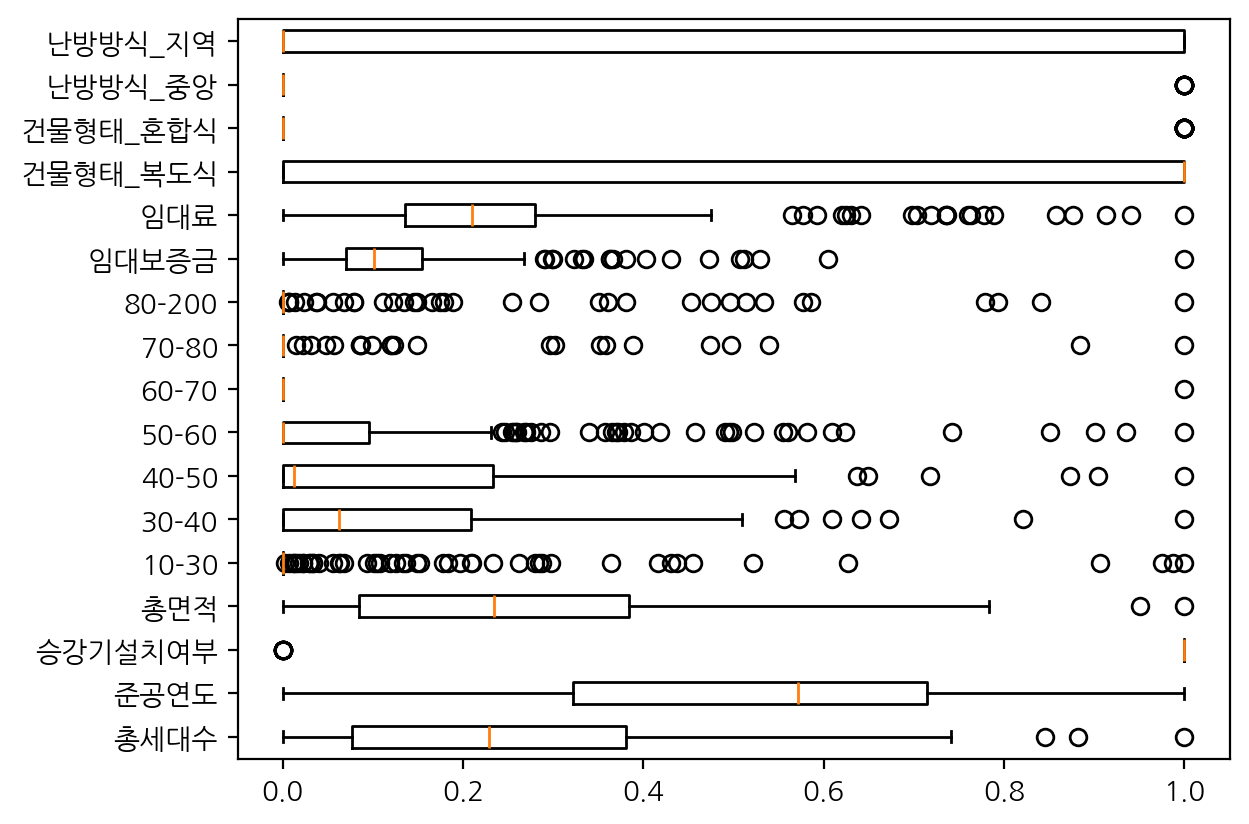

In [28]:
#타입이 int 피처 찾기
numerical_columns = x.select_dtypes(include=['number']).columns
#MinMax정규화
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_val[numerical_columns] = scaler.transform(x_val[numerical_columns])
plt.boxplot(x_train[numerical_columns],vert=False,labels=x_train[numerical_columns].columns)

In [29]:
x_train

,총세대수,준공연도,승강기설치여부,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
31,0.067308,0.750000,1.0,0.102221,0.0,0.000000,0.000000,0.049169,0.0,0.022487,0.078824,0.403082,0.913037,0.0,0.0,0.0,1.0
245,0.163462,0.642857,1.0,0.153526,0.0,0.160252,0.116057,0.000000,0.0,0.000000,0.000000,0.175844,0.279098,1.0,0.0,0.0,1.0
278,0.388986,0.607143,1.0,0.383618,0.0,0.234430,0.197138,0.213296,0.0,0.000000,0.000000,0.189255,0.295339,1.0,0.0,0.0,0.0
165,0.379808,0.607143,1.0,0.380461,0.0,0.237929,0.354531,0.058172,0.0,0.000000,0.000000,0.162240,0.299804,1.0,0.0,0.0,1.0
250,0.633304,0.321429,1.0,0.647628,0.0,0.218334,0.904610,0.000000,0.0,0.000000,0.000000,0.088952,0.131397,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.214598,0.428571,1.0,0.191198,0.0,0.173548,0.193959,0.000000,0.0,0.000000,0.000000,0.076823,0.103854,1.0,0.0,0.0,0.0
71,0.024913,0.500000,1.0,0.042067,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.068235,0.000000,0.000000,0.0,0.0,0.0,0.0
106,0.235577,0.071429,1.0,0.206725,0.0,0.377887,0.000000,0.000000,0.0,0.000000,0.000000,0.050948,0.168049,1.0,0.0,1.0,0.0
270,0.444493,0.428571,1.0,0.471446,0.0,0.123863,0.143084,0.457756,0.0,0.000000,0.000000,0.087822,0.140399,0.0,1.0,0.0,0.0


In [30]:
from sklearn.linear_model import LinearRegression # 명재
from sklearn.neighbors import KNeighborsRegressor # 명재
from sklearn.tree import DecisionTreeRegressor #  미소님
from sklearn.ensemble import RandomForestRegressor # 진현님, 상우님
from xgboost import XGBRegressor #광훈님
from lightgbm import LGBMRegressor #광훈님 params

from sklearn.metrics import r2_score as r2,mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### (2) 모델 1: LinearRegression 

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression(fit_intercept=False)
#LR=LinearRegression(fit_intercept=True)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_val)

print('r2_score: ',r2(y_val,y_pred))
print('mean_absolute_error: ',mae(y_val,y_pred))
print('mean_squared_error: ',mse(y_val,y_pred))


"""
mean_absolute_error:  175.97694638742962
mean_squared_error:  70719.85356852651
r2_score:  0.44621335548423424
"""

"""
mean_absolute_error:  174.9767306894638
mean_squared_error:  67535.53826468746
r2_score:  0.4711488042756332
"""

r2_score:  0.44621335548423424
mean_absolute_error:  175.97694638742962
mean_squared_error:  70719.85356852651


'\nr2_score:  0.4711488042756332\nmean_absolute_error:  174.9767306894638\nmean_squared_error:  67535.53826468746\n'

### (3) 모델 2: KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 파라미터 설정
params = {
    'n_neighbors': [3, 5, 10, 20, 30],           # 이웃 수
    'weights': ['uniform', 'distance'],           # 가중치 방식
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # 이웃 탐색 알고리즘
    'leaf_size': [20, 30, 50, 100],               # 트리 리프 크기
    'p': [1, 2, 3],                               # 거리 측정 방법 (1: 맨해튼, 2: 유클리드, 3: 민코프스키)
}

# GridSearchCV 설정
KNN_grid = GridSearchCV(KNeighborsRegressor(), params, cv=5, scoring='r2')
KNN_grid.fit(x_train, y_train)
y_pred=KNN_grid.predict(x_val)

# 최적의 파라미터와 최고 성능 출력
print('최적 파라미터:', KNN_grid.best_params_)
print('최고 성능:', KNN_grid.best_score_)
print('MAE:',mean_absolute_error(y_val, y_pred))
print('MSE',mean_squared_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

"""
최적 파라미터: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
최고 성능: 0.7329411846506618
mean_absolute_error:  158.3307692467145
mean_squared_error:  58211.04221476367
r2_score:  0.54416622609883
"""

### (4) 모델 3: DecisionTreeRegressor

In [ ]:
# 파라미터 선언
params = {'max_depth':range(1,20),
         'min_samples_split':range(1,20),
         'min_samples_leaf':range(1,20)}
model =  = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='r2')

# 학습
model.fit(x_train, y_train)

print('최고 평균 정확도 수치:{0:.4f}'.format(model.best_score_))
print('최적 하이퍼 파라미터:', model.best_params_)

# 예측
y_pred = model.predict(x_val)

# 평가
print('MAE:',mean_absolute_error(y_val, y_pred))
print('MSE',mean_squared_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

"""
최고 평균 r2 수치:0.7189
최적 하이퍼 파라미터: {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 2}
MAE: 156.5582498280774
MSE 52649.59000458235
R2: 0.6175634473928044
"""

### (5) 모델 4: RandomForestRegressor

In [ ]:
# 파라미터 선언
param = {'bootstrap': [True, False],
         'max_samples': [0.5, 0.75, 0.8, 1.0]}
model = GridSearchCV(RandomForestRegressor(random_state = 42),
                    param,
                    cv = 5,
                    scoring = 'r2')
#학습
model.fit(x_train, y_train)

print('최적파라미터 :', model.best_params_)
print('최고성능 :', model.best_score_)

#예측
y_val_pred = model.predict(x_val)

#평가
print('MAE :', mean_absolute_error(y_val, y_val_pred))
print('MSE :', mean_squared_error(y_val, y_val_pred))
print('r2 :', r2_score(y_val, y_val_pred))


"""
==================================
# 결과출력

최적파라미터 : {'bootstrap': True, 'max_samples': 0.8}
최고성능 : 0.7684809676429054
MAE : 132.1616346153846
MSE : 44547.58023365385
r2 : 0.6511608306005995
==================================
"""

### (6) 모델 5: XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 파라미터 범위 설정
param = {
    'max_depth': range(3, 21, 2),                   # 3부터 20까지 2 간격으로 설정
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       # 학습률 범위
    'n_estimators': [100, 150, 200],               # 트리 개수
    'subsample': [0.6, 0.8, 1.0],                 # 샘플링 비율
    'colsample_bytree': [0.6, 0.8, 1.0],          # 트리의 열 샘플링 비율
    'gamma': [0, 1, 5],                           # 손실 함수에 대한 가중치
    'min_child_weight': [1, 3, 5],                # 리프 노드의 최소 가중치
}

# GridSearchCV를 사용한 XGBRegressor 모델
model_xgb = GridSearchCV(
    XGBRegressor(),
    param, cv=5, scoring='r2'  # 5겹 교차검증 사용, R2 스코어로 평가
)

# 모델 학습
model_xgb.fit(x_train, y_train)

# 최적 파라미터와 최고 성능 출력
print('최적 파라미터 :', model_xgb.best_params_)
print('최고 성능 :', model_xgb.best_score_)

# 예측 수행
y_val_pred = model_xgb.predict(x_val)

# 평가 지표 출력
print('MSE :', mean_squared_error(y_val, y_val_pred))
print('MAE :', mean_absolute_error(y_val, y_val_pred))
print('R2 :', r2_score(y_val, y_val_pred))

"""
최적 파라미터 : {'subsample': 1.0, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
최고 성능 : 0.78363397549859
MSE : 48861.22923535232
MAE : 144.18808045754065
R2 : 0.6173818974477667
"""

### (7) 모델 6: 알고리즘

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 파라미터 범위 설정
param = {
    'max_depth': range(3, 21, 2),               # 트리 최대 깊이 (3부터 20까지 2씩 증가)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
    'n_estimators': [100, 150, 200],           # 트리 개수
    'feature_fraction': [0.6, 0.8, 1.0],       # 특성 샘플링 비율
    'bagging_fraction': [0.6, 0.8, 1.0],       # 배깅 샘플링 비율
    'lambda_l1': [0, 1, 5],                    # L1 규제 (정규화)
    'lambda_l2': [0, 1, 5],                    # L2 규제 (정규화)
    'min_child_samples': [5, 10, 20]           # 리프 노드의 최소 샘플 수
}

# GridSearchCV를 사용한 LGBMRegressor 모델
model_lgbm = GridSearchCV(
    LGBMRegressor(),
    param, cv=5, scoring='r2'  # 5겹 교차 검증, R2 스코어로 평가
)

# 모델 학습
model_lgbm.fit(x_train, y_train)

# 최적 파라미터와 최고 성능 출력
print('최적 파라미터 :', model_lgbm.best_params_)
print('최고 성능 :', model_lgbm.best_score_)

# 검증 데이터에 대해 예측 수행
y_val_pred = model_lgbm.predict(x_val)

# 평가 지표 출력
print('MSE :', mean_squared_error(y_val, y_val_pred))
print('MAE :', mean_absolute_error(y_val, y_val_pred))
print('R2 :', r2_score(y_val, y_val_pred))

"""
LGBMRegressor 결과
최적 파라미터 : {'n_estimators': 82, 'min_child_samples': 2, 'max_depth': 2, 'learning_rate': 0.1}
최고 성능 : 0.7963617245637279
MAE : 136.87653893662144
MSE : 46068.93601623922
R2 : 0.6392475350910687
"""

### (7) 성능 비교

- 각 모델의 성능을 비교합니다.

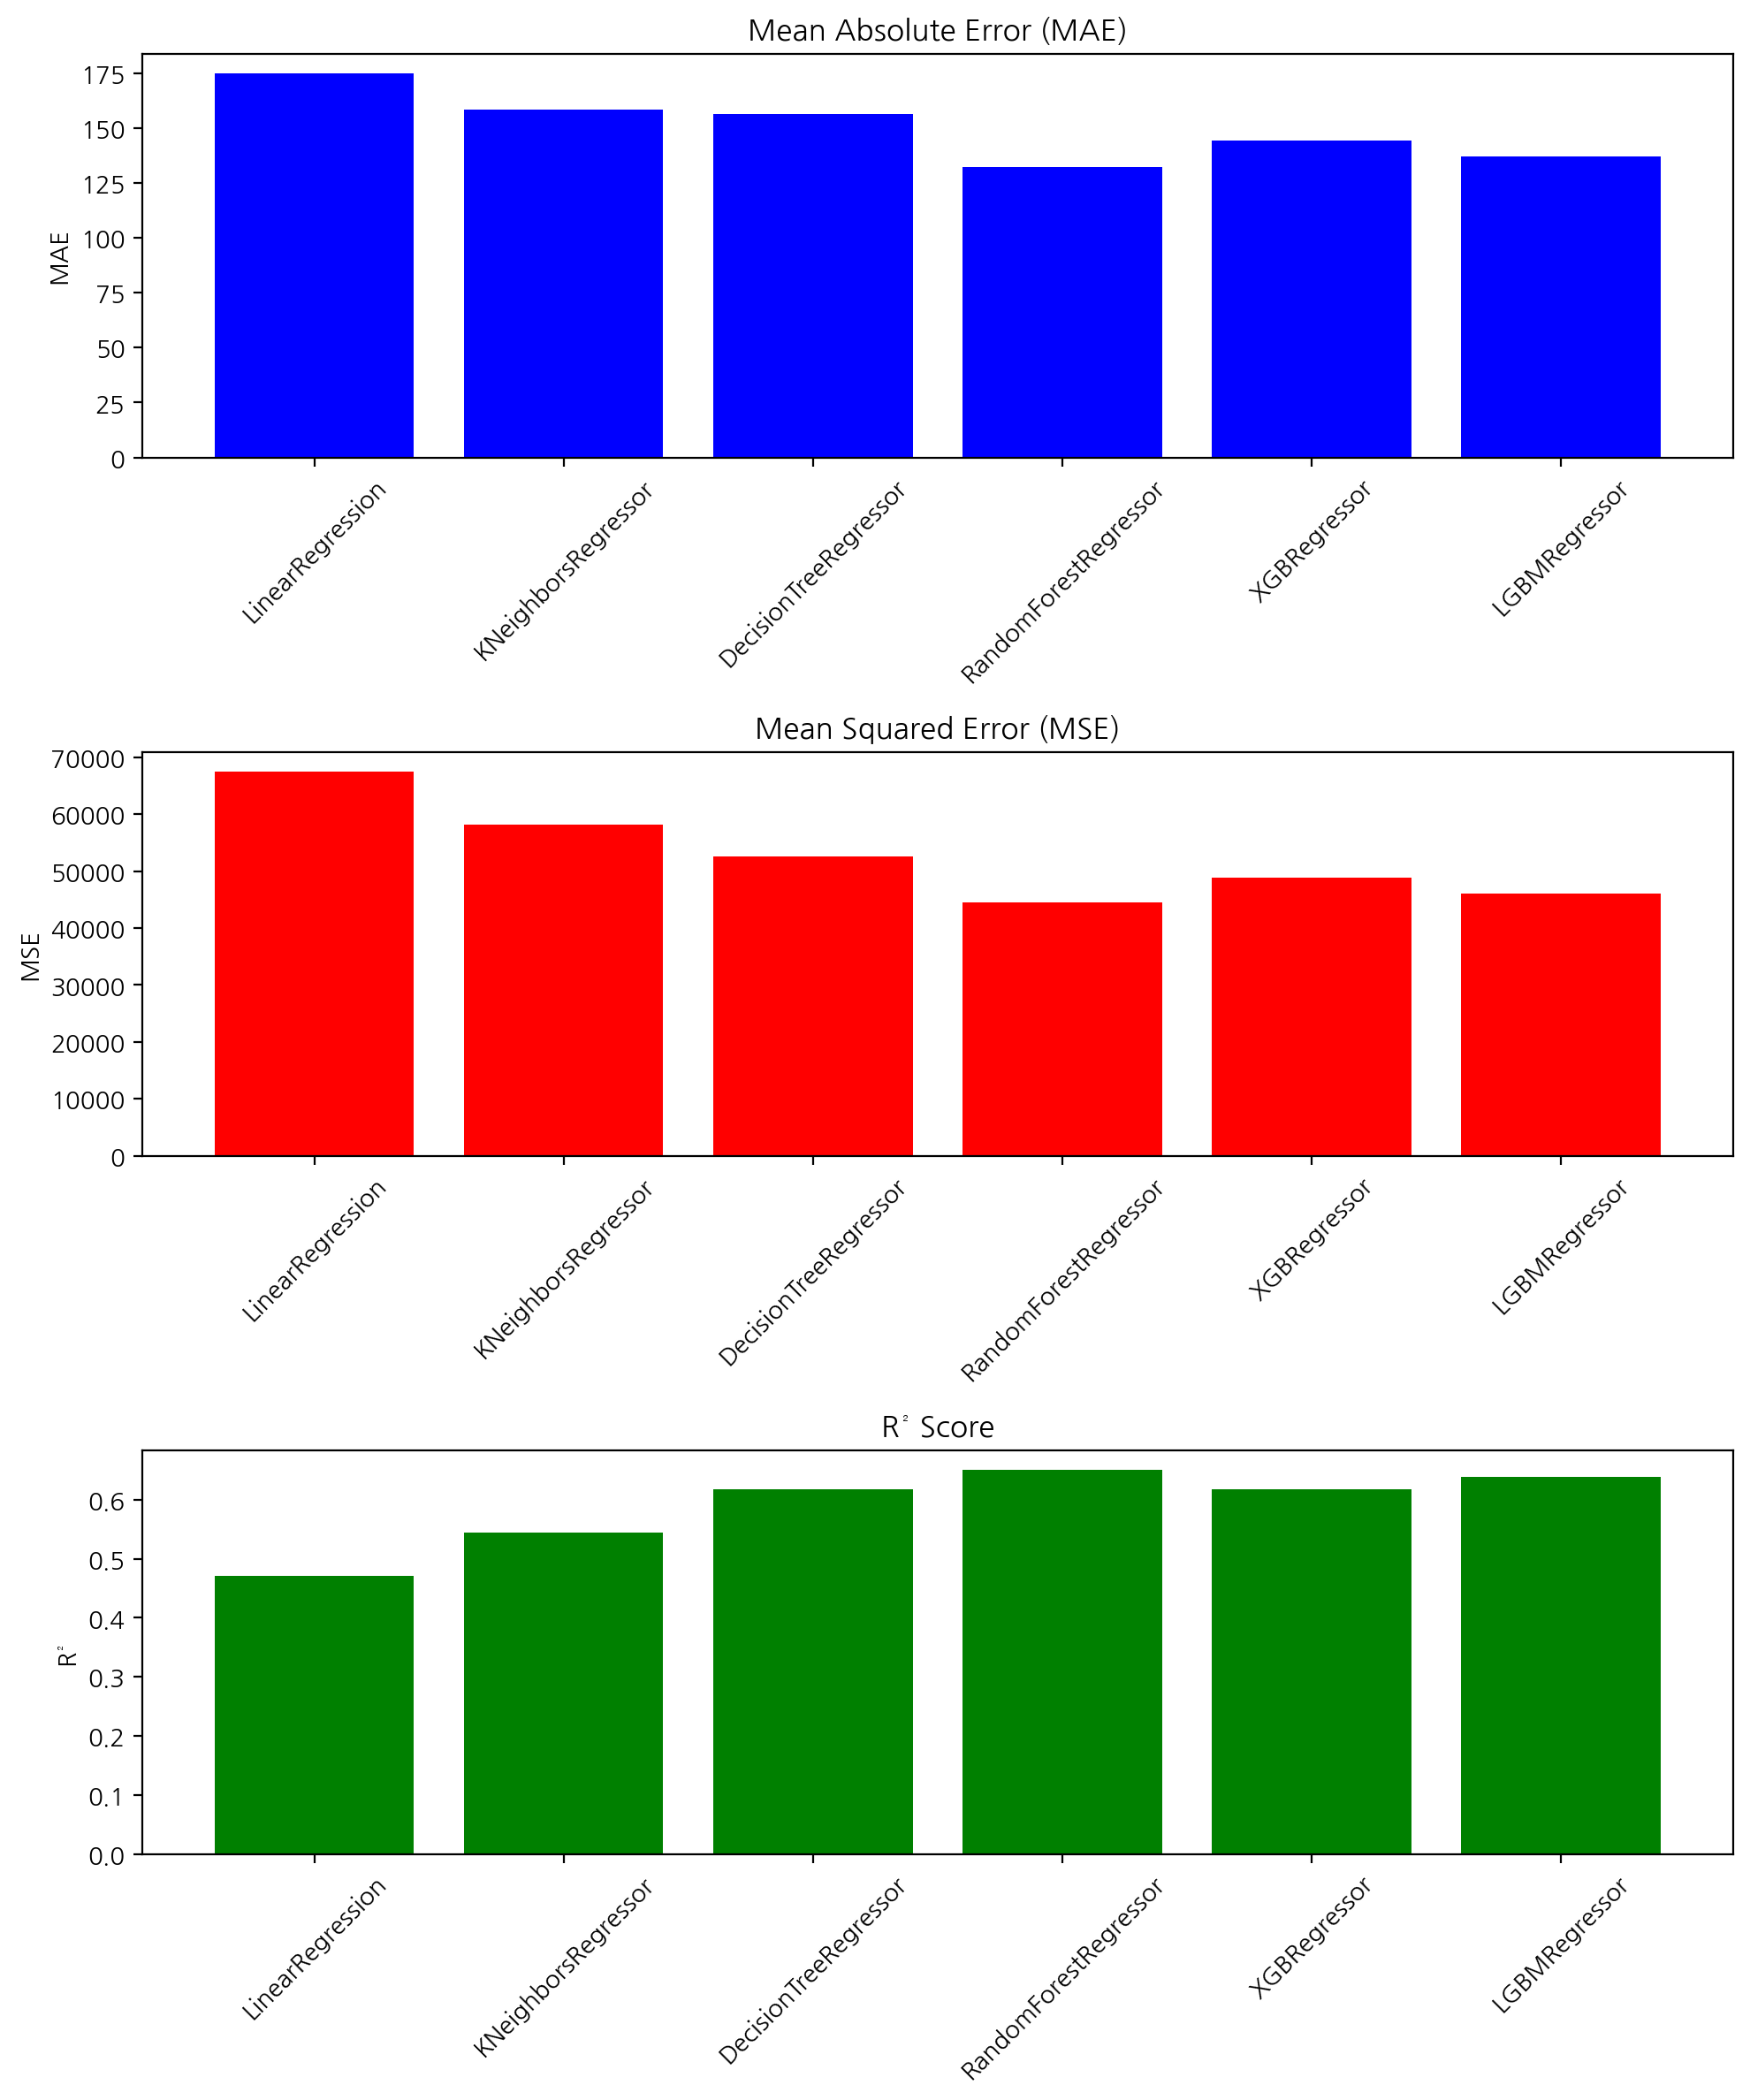

In [65]:
# 서브플롯을 사용하여 3개의 그래프를 각각 그리기
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 첫 번째 서브플롯 - MAE
axes[0].bar(models, mae_values, color='b')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xticklabels(models, rotation=45)

# 두 번째 서브플롯 - MSE
axes[1].bar(models, mse_values, color='r')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].set_xticklabels(models, rotation=45)

# 세 번째 서브플롯 - R² Score
axes[2].bar(models, r2_values, color='g')
axes[2].set_title('R² Score')
axes[2].set_ylabel('R²')
axes[2].set_xticklabels(models, rotation=45)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()


## 3. 파이프라인 구축

- 새로운 데이터를 불러오고, 이 데이터를 처리할 파이프라인 함수를 만듭니다.

### (1) New Data 불러오기

- test.xlsx 파일을 읽어와 new_data 데이터프레임으로 선언합니다.
- 해당 데이터는 '실차량수' 변수가 없는 것 외에는, 최초 데이터와 동일한 구조입니다.
- 이 데이터를 대상으로 전처리와 예측을 수행합니다.

In [87]:
# 파일 읽어오기
new_data = pd.read_excel(path+'test.xlsx')

# 확인
new_data.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료
0,C0005,서울석촌 도시형주택(공임10년),20,6,서울,20121115,복도식,개별가스난방,전체동 설치,9,17.53,11.7251,50449000,263710
1,C0005,서울석촌 도시형주택(공임10년),20,10,서울,20121115,복도식,개별가스난방,전체동 설치,9,24.71,16.5275,52743000,321040
2,C0005,서울석촌 도시형주택(공임10년),20,4,서울,20121115,복도식,개별가스난방,전체동 설치,9,26.72,17.8720,53890000,332510
3,C0017,대구혁신센텀힐즈,822,228,대구경북,20180221,계단식,지역난방,NaN,824,51.87,20.9266,29298000,411200
4,C0017,대구혁신센텀힐즈,822,56,대구경북,20180221,계단식,지역난방,NaN,824,59.85,24.1461,38550000,462600


### (2) 데이터 파이프라인 구축

- 데이터 파이프라인 함수를 만듭니다.
- 학습 데이터에 대해 진행했던 모든 전처리 과정을 평가 데이터에도 일괄 진행해야 합니다.
    - 입력: new_data
    - 출력: 전처리가 완료된 예측 직전 데이터프레임
- 새로운 데이터에는 '실차량수' 변수가 없음을 유의합니다.
- 참고: 다음 내용들이 처리되어야 합니다.
    - 결측치 처리
    - 변수 추가
    - 불필요한 변수 제거
    - 단지 데이터, 상세 데이터 분리
    - 단지코드별 총면적 합 집계
    - 전용면적 구간별 집계 (피벗 형태)
    - 임대보증금, 임대료 평균 집계
    - 집계 결과 병합
    - 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    - 승강기설치여부: 0, 1 값으로 변경
    - 단지모드, 지역 변수 제거
    - 가변수화

In [89]:
max_ele_by_year = {  1992: '1',
                     1993: '1',
                     1994: '1',
                     1995: '1',
                     1996: '1',
                     1997: '1',
                     1998: '1',
                     1999: '1',
                     2000: '1',
                     2001: '1',
                     2002: '1',
                     2003: '1',
                     2004: '1',
                     2005: '1',
                     2006: '1',
                     2007: '1',
                     2008: '1',
                     2009: '1',
                     2010: '1',
                     2011: '1',
                     2012: '1',
                     2013: '1',
                     2014: '1',
                     2015: '1',
                     2016: '1',
                     2017: '1',
                     2018: '1',
                     2019: '1',
                     2020: '1',
                     2021: '1',
                     2022: '1'
                  }

In [90]:
max_building_by_year = { 1992: '복도식',
                         1993: '복도식',
                         1994: '복도식',
                         1995: '복도식',
                         1996: '복도식',
                         1997: '복도식',
                         1998: '복도식',
                         1999: '복도식',
                         2000: '복도식',
                         2001: '복도식',
                         2002: '복도식',
                         2003: '복도식',
                         2004: '복도식',
                         2005: '복도식',
                         2006: '혼합식',
                         2007: '혼합식',
                         2008: '혼합식',
                         2009: '복도식',
                         2010: '복도식',
                         2011: '복도식',
                         2012: '복도식',
                         2013: '계단식',
                         2014: '계단식',
                         2015: '계단식',
                         2016: '복도식',
                         2017: '복도식',
                         2018: '계단식',
                         2019: '복도식',
                         2020: '복도식',
                         2021: '복도식',
                         2022: '복도식'
                       }

In [91]:
max_heating_by_year = {  1992: '지역',
                         1993: '중앙',
                         1994: '중앙',
                         1995: '중앙',
                         1996: '개별',
                         1997: '개별',
                         1998: '개별',
                         1999: '개별',
                         2000: '개별',
                         2001: '개별',
                         2002: '개별',
                         2003: '개별',
                         2004: '개별',
                         2005: '개별',
                         2006: '개별',
                         2007: '개별',
                         2008: '개별',
                         2009: '지역',
                         2010: '지역',
                         2011: '지역',
                         2012: '개별',
                         2013: '지역',
                         2014: '지역',
                         2015: '개별',
                         2016: '지역',
                         2017: '지역',
                         2018: '지역',
                         2019: '개별',
                         2020: '개별',
                         2021: '지역'
                      }

In [106]:
# 파이프라인 만들기
def data_pipeline(data,scaler,max_ele_by_year,max_building_by_year,max_heating_by_year):
    apart=data.copy()
    # 필요한 피처 추가 및 범주 재분류
    apart['준공연도']=apart['준공일자'] //10000
    apart['총면적']=(apart['전용면적']+apart['공용면적'])*apart['전용면적별세대수']
    
    apart['난방방식'] = apart['난방방식'].str[:2]
    apart['승강기설치여부'] = apart['승강기설치여부'].replace({
        '전체동 설치': '1',
        '일부동 설치': '0',
        '미설치': '0',
    })
    # 연도별 최빈값으로 대체
    for year, heating_type in max_heating_by_year.items():
        apart.loc[(apart['준공연도'] == year) & (apart['난방방식'].isna()), '난방방식'] = heating_type
    for year, building_type in max_building_by_year.items():
        apart.loc[(apart['준공연도'] == year) & (apart['건물형태'].isna()), '건물형태'] = building_type
    for year, ele_type in max_ele_by_year.items():
        apart.loc[(apart['준공연도'] == year) & (apart['승강기설치여부'].isna()), '승강기설치여부'] = ele_type
    # 외부 데이터 기반  결측치 보완
    apart.loc[apart['준공연도']==2022,'난방방식']='개별'
    # 불필요한 데이터 제거 (분석을 위해 추가했던 피처 또한 제거)
    apart=apart.drop(['단지명','단지내주차면수','준공일자'],axis=1)
    #data01 생성
    data01=apart[['단지코드','총세대수','지역','준공연도','건물형태','난방방식','승강기설치여부']]
    data01= data01.drop_duplicates().reset_index(drop=True)
    
    #df_area 생성
    data02=apart[['단지코드', '총면적','전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]
    df_area=data02.groupby('단지코드')['총면적'].sum()
    #df_pivot 생성
    bins = [10, 30, 40, 50, 60, 70, 80, 200]
    labels = ['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-200'] 
    data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=bins, labels=labels, right=False)
    temp=data02.groupby(['단지코드','전용면적구간'])['전용면적별세대수'].sum().reset_index()
    df_pivot = temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수')
    df_pivot.columns.name = None
    df_pivot = df_pivot.reset_index()
    #df_rent 생성
    df_rent=data02.groupby('단지코드')[['임대보증금','임대료']].mean().reset_index()
    #데이터 병합
    base_data = pd.merge(data01, df_area, on='단지코드', how='left')
    base_data = pd.merge(base_data, df_pivot, on='단지코드', how='left')
    base_data = pd.merge(base_data, df_rent, on='단지코드', how='left')
    base_data=base_data.drop(['단지코드','지역'],axis=1)
    #타입인 obj 피처 찾기
    categorical_columns = base_data.select_dtypes(include=['object']).columns
    #가변수화
    data_dummies=pd.get_dummies(base_data,columns=['건물형태','난방방식'],drop_first=True, dtype=int)
    data_dummies['승강기설치여부']=data_dummies['승강기설치여부'].astype('int32')
    #Minmax
    numerical_columns = data_dummies.select_dtypes(include=['number']).columns
    data_dummies[numerical_columns] = scaler.transform(data_dummies[numerical_columns])
    
    return data_dummies

### (3) 예측하기

- new_data를 파이프라인을 사용해 전처리한 후 가장 성능이 좋았던 모델로 예측한 결과를 확인합니다.

In [115]:
# 데이터 전처리
data = data_pipeline(new_data,scaler,max_ele_by_year,max_building_by_year,max_heating_by_year)

# 확인
data

,총세대수,준공연도,승강기설치여부,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,0.008304,0.678571,1.0,0.004587,0.016935,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.275841,0.374994,1.0,0.0,0.0,0.0
1,0.358829,0.892857,1.0,0.208719,0.000000,0.000000,0.000000,0.279778,0.0,0.000000,0.000000,0.186838,0.546346,0.0,0.0,0.0,1.0
2,0.048514,0.750000,1.0,0.082456,0.000000,0.000000,0.000000,0.000000,0.0,0.026455,0.108235,0.519948,0.913037,0.0,0.0,0.0,1.0
3,0.052885,0.642857,1.0,0.086662,0.000000,0.000000,0.000000,0.000000,0.0,0.029101,0.117647,0.000000,0.000000,0.0,0.0,0.0,1.0
4,0.114073,0.642857,1.0,0.187031,0.000000,0.000000,0.000000,0.000000,0.0,0.101852,0.217647,0.000000,0.000000,0.0,0.0,0.0,1.0
5,0.014860,0.285714,1.0,0.022004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.041176,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.020105,0.571429,1.0,0.033833,0.000000,0.000000,0.000000,0.000000,0.0,0.011905,0.044706,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.065997,0.535714,1.0,0.113109,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.178824,0.000000,0.000000,0.0,0.0,0.0,1.0
8,0.031469,0.428571,1.0,0.051768,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.085882,0.000000,0.000000,0.0,0.0,0.0,1.0
9,0.249126,0.178571,1.0,0.225802,0.000000,0.187544,0.240859,0.000000,0.0,0.000000,0.000000,0.087982,0.263873,1.0,0.0,0.0,1.0


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model4=RandomForestRegressor(random_state = 42,bootstrap=True,max_samples=0.8)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_val)
print('MSE :', mean_squared_error(y_val, y_pred))
print('MAE :', mean_absolute_error(y_val, y_pred))
print('R2 :', r2_score(y_val, y_pred))


MSE : 47115.89415192309
MAE : 137.73499999999999
R2 : 0.6310491098447968


In [111]:
# 예측하기
predicted = model4.predict(data)

# 확인
print(predicted)

[  49.09  495.64  620.68  761.68  703.13  292.87  392.01  652.02  666.53
  432.78  236.3    75.32 1433.75  610.08  545.38  756.03  612.67  133.48
 1081.22  918.39  292.24  807.18  830.36  823.68  916.23  271.25   84.54
 1277.86  249.2   686.87]


- 아파트 기본 정보에 예측한 차량수를 붙여 마무리합니다.

In [113]:
# 데이터 셋 두개로 나누기
vars = ['단지코드', '단지명', '총세대수', '지역', ]
result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)

# 예측 결과 추가
result['예상차량수'] = predicted.round(1).astype(int)

# 확인
result

,단지코드,단지명,총세대수,지역,예상차량수
0,C0005,서울석촌 도시형주택(공임10년),20,서울,49
1,C0017,대구혁신센텀힐즈,822,대구경북,495
2,C0034,광교 호반마을 22단지 아파트,112,경기,620
3,C0046,죽미마을 휴먼시아12단지,122,경기,761
4,C0055,파주운정 한울마을 6단지,262,경기,703
5,C0072,벌교제석휴먼시아,35,광주전남,292
6,C0073,무안남악오룡마을,47,광주전남,392
7,C0084,진해 석동우림필유 아파트,152,경남,652
8,C0085,김해북부 두산위브 아파트,73,경남,666
9,C0112,운암주공6단지아파트,571,경기,432
